# **Être dans le top 10% d'une compétition Kaggle avec approche simple de Machine Learning** - [voir l'article](https://inside-machinelearning.com/top-10-dune-competition-kaggle-approche-simplee-machine-learning/)

Dans cet article je vous propose une **approche simple et rapide** pour réussir une **compétition Kaggle de Machine Learning !**

Récemment, je me suis mis sur **Kaggle** pour tester mes **skills**.

**Kaggle** est un site qui propose des **compétitions** d'analyse de données et de **Machine Learning**.

Les plus **expérimentés** peuvent y **gagner des prix** allant jusqu'à **100.000$**.. attractif pour des **Data Scientists** comme nous !

Ici je vous propose de voir comment **résoudre** une des **compétitions de base** de Kaggle : [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview).

Un **cas classique de Machine Learning** où nous devons utiliser **plusieurs types de données** (chiffres et texte) pour faire une **prédiction**.

**Commençons sans plus attendre !** ;)


# **Comprendre les données**

## **Charger les données**

Le but de cette **compétition** est de prédire selon **les caractéristiques d'une personne** (âge, sexe, ...) et **les caractéristiques de son voyage** à bord du Titanic (ticket, port d'embarcation, cabine, ...) si la personne **va survivre**.

Ces **caractéristiques** sont nos données sur lesquels on va **entrainer notre modèle de Machine Learning** pour prédire la **survie des passagers**.

On a accès ici à **deux fichiers** au format CSV:
- train.csv pour **entraîner notre modèle**
- test.csv pour **faire la prédiction**

En fait, vu que c'est une **compétition Kaggle**, les données test ne seront **pas utiliser pour tester le modèle** car il n'y a pas de **données de vérification** (y_test).

On a seulement les **informations**(x_test) **sur les voyageur du Titanic**. Ces données seront utilisés pour faire **une prédiction qu'on soumettra a Kaggle.**

Ensuite cette prédiction sera **automatiquement comparé** par Kaggle avec les **données réelles** (y_test). L'**erreur entre notre prédiction et la réalité** définira notre note et donc **notre place dans la compétition.**

Eh oui ! Si on avait **déjà le résultat** (y_test) on pourrait **facilement tricher.**


Pour commencer, on **charge les données** depuis [Github](https://github.com/tkeldenich/RandomForest_MachineLearning_Categorical_and_Numerical_Data).

In [1]:
!git clone https://github.com/tkeldenich/RandomForest_MachineLearning_Categorical_and_Numerical_Data.git &> /dev/null

## **Analyser les données**

On importe les **librairies de base** pour gérer des données :
- *numpy*
- *pandas*

In [2]:
import numpy as np
import pandas as pd

Dans un premier temps, on regarde **la structure de nos donnée**s :
- **PassengerId**, le numéro du passager
- **Survived**, si 1 le passager a survécu, 0 sinon (ce sont les données que nous devons prédire)
- **Pclass**, la classe du passager 1 étant la meilleur, 3 la moins bonne
- **Name**, le nom du passager
- **Sex**, le sexe de l'individu
- **Age**, l'âge du passager
- **SibSp**, nombre de frère et sœur du passager à bord du Titanic
- **Parch**, nombre de parents du passager à bord du Titanic
- **Ticket**, le numéro du Ticket
- **Fare**, prix du Ticket
- **Cabin**, le numéro de cabine
- **Embarked**, port d'embarcation C pour Cherbourg, Q pour Queenstown, S pour Southampton

On **charge donc les données** et on les **affiche :**

In [3]:
train_data = pd.read_csv("/content/RandomForest_MachineLearning_Categorical_and_Numerical_Data/train.csv")

train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


On peut aussi regarder les **données de test** et on voit que la colonne **Survived** n'est effectivement **pas présente** comme expliqué précédemment.

In [4]:
test_data = pd.read_csv("/content/RandomForest_MachineLearning_Categorical_and_Numerical_Data/test.csv")

test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


Ensuite, **pour plus de commodités**, on sépare la **colonne à prédire Survived** des autres colonnes de note dataset.

In [5]:
train_targets = train_data[['Survived']]
train_data = train_data.drop('Survived', axis = 1)

Avant d'effectuer le preprocessing **on rassemble les données d'entraînement et de test** dans un même dataset pour que la **transformation** s'applique sur toute nos données.

In [6]:
data = pd.concat([train_data, test_data])

## **Processing des données**

### **Transformation**

Vient l'étape **la plus importante** du Machine Learning : **le preprocessing.**

Le **preprocessing** consiste à **transformer les données** pour que **le modèle de Machine Learning** puisse les ingurgiter, les **comprendre.**

Ici quelques données nous **posent problèmes**, ce sont **les données catégorielles** (par opposition aux données numériques).

Par exemple la colonne **Embarked**. Elle n'a pas de données chiffrées. Au contraire, elle possède **des catégories** :
- Cherbourg
- Queenstown
- Southampton

Il faut  **transformer ces données en chiffres** pour que le modèle de Machine Learning puissent les comprendre, **les interpréter.**

Pour cela on utilise le **One-Hot Encoding** dont on a déjà parlé dans [cet article](https://inside-machinelearning.com/preprocessing-nlp-tutoriel-pour-nettoyer-rapidement-un-texte/).

La **librairie** *pandas* nous offre une manière simple et rapide d'effectuer le **One-Hot Encoding** : la fonction *get_dummies()*.

Elle **transforme une colonne** d'un dataframe **en plusieurs colonnes One-Hot encoded.**

Par exemple, avec la colonne **Embarked**, on a **trois catégories.** Eh bien *get_dummies()* va créer **trois colonnes** qui représenteront chacune **une catégorie**.

On aura donc une colonne pour **Cherbourg**, une pour **Queenstown** et une autre pour **Southampton.**

Si un **passager** a embarqué à **Cherbourg** un **1** sera inscrit **dans cette colonne** et un **0 dans les autres.** Cela pour chaque passager **selon le port embarqué.**

**Concrétement**, voilà ce que ça donne :

In [7]:
pd.get_dummies(data["Embarked"]).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


Cela veut dire que **le passager numéro 0** à embarquer à **Southampton**, le **numéro 1** à **Cherbourg** le **numéro 2** à **Southampton** etc.

On va appliquer ce **One-Hot Encoding** sur **les colonnes que l'on estime importante** pour déterminer si une personne à **survécu ou non.**

On choisit ici :
- **Embarked**
- **Sex**
- **Cabin**

In [8]:
features = ["Embarked", "Sex", "Cabin"]
new_data = pd.get_dummies(data[features])

En plus de **ces données catégorielles** processées, on ajoute **les données chiffrées** importantes.

### **Vérification**

Avec cela on devrait avoir un **bon dataset** pour faire notre **prédiction** !

In [9]:
new_data = pd.concat([new_data,data[['Pclass', 'Age', 'SibSp', 'Parch']]], axis = 1)

Puis, on peut **afficher notre dataset :**

In [10]:
new_data.head(2)

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_A10,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,Cabin_A19,Cabin_A20,Cabin_A21,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A29,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_A9,Cabin_B10,Cabin_B101,Cabin_B102,Cabin_B11,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B24,Cabin_B26,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B36,...,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E39 E41,Cabin_E40,Cabin_E44,Cabin_E45,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E52,Cabin_E58,Cabin_E60,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass,Age,SibSp,Parch
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,22.0,1,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38.0,1,0


Il y a aussi d'autres types de donnés qui sont **ni chiffrées, ni catégoriques.** Par exemple la colonne **Ticket** est une chaîne de caractère indiquant **le numéro de ticket** du passager.

Pour le coup, c'est **typiquement** une donnée qui ne nous indiquera pas si le passager survivra ou non. Au contraire, le numéro de ticket agit plutôt **comme PassengerId**, un numéro qui permet de **différencier un passager d'un autre.**

Pas besoin dans ce cas de **le prendre en compte.**

Une **vérification intéressante** néanmoins est de voir si notre dataset est **totalement rempli**, s'il n'y a **pas de valeur manquante.**

On peut utiliser les **librairies** *matplotlib* et *seaborn* pour cela.

Elles permettent de nous **afficher** joliement où se trouvent nos **données manquantes** (les lignes jaunes).

**Dans notre cas**, elles sont au niveau de la colonne **Age** et **Cabin**. Par ailleurs, il y a **beaucoup de données manquantes** dans cette dernière.

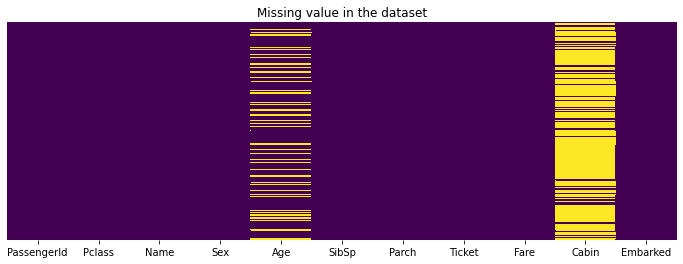

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

Le **modèle n'acceptera pas** ces données manquantes écrites **NaN**.

On utilise alors la fonction *fillna(0)* qui **remplace** tous les **NaN par 0.** Cela permettra à notre modèle de Machine Learning de **comprendre que ces valeurs sont nulles.**

In [12]:
new_data = new_data.fillna(0)
new_data.head(3)

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_A10,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,Cabin_A19,Cabin_A20,Cabin_A21,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A29,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_A9,Cabin_B10,Cabin_B101,Cabin_B102,Cabin_B11,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B24,Cabin_B26,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B36,...,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E39 E41,Cabin_E40,Cabin_E44,Cabin_E45,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E52,Cabin_E58,Cabin_E60,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass,Age,SibSp,Parch
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,22.0,1,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38.0,1,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,26.0,0,0


Vous vous souvenez.. **tout à l'heure** on a créer un seul dataset avec **les données train et test.** Il est temps de **séparer à nouveau** ces datasets pour utiliser **le premier pour l'entraînement** du modèle et **le deuxième pour la prédiction.**

In [13]:
X_train = new_data[:len(train_data)]
X_test = new_data[len(train_data):]

On créer aussi une variable **y_train** contenant **la colonne a prédire**, Survived, **sous forme d'array** et non de Dataframe. **y_train** doit être sous cette forme pour **effectuer du Machine Learning.**

In [14]:
y_train = train_targets.values.ravel()

# **Prédire avec le Machine Learning**

## **Créer un modèle**

Pour ce **jeux de données** nous allons utilisé une **Forêt d'Arbres de Décision** aussi appelé *Random Forest*.

Ce modèle de Machine Learning applique **plusieurs Arbres de Décision** sur des parties différentes de notre **jeu de données**. De tel sorte, l'ensemble de ces Arbres de Décision nous donne une **vue d'ensemble** assez **exact sur nos données** et permet ainsi d'effectuer **une bonne prédiction**.

En fait, l'Arbre de Décision de base est un **classificateur**. C'est à dire que si on lui donne **les caractéristiques d'un passager** il le classifiera **soit en tant que survivant** soit en tant que non survivant, **idéal pour notre compétition !**

L'idée d'un **Random Forest** est de prendre la **prédiction majoritaire** de tous ses Arbres de Décision.

Par exemple, on fait **une prédiction sur un passager**. Trois Arbres de Décision classent ce passager **comme survivant** et deux autres font l'inverse. Eh bien le **Random Forest** prend la prédiction majoritaire : **survivant.**

On utilise ici la **librairie** *sklearn* pour initialiser un **Random Forest.**

La fonction *RandomForestClassifier()* a **trois paramètres principaux** :
- **n_estimators**, le nombre d'Arbres de Décision
- **max_depth**, la profondeur maximale d'un arbre (None si on ne veut pas de limite prédéfinie)
- **random_state**, permet de contrôler l'aspect aléatoire du Random Forest (la séparation du jeu de données pour l'entraînement des Arbres de Décision)

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=3)

On peut ensuite construire **une forêt d'arbres** à partir de **l'ensemble d'apprentissage** (X_train, y_train).

En fait, on **entraîne notre modèle** de Random Forest à **prédire les données y_train** en fonction des données x_train.

In [16]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

On **évalue la précision** de notre modèle avec la **validation croisée** qui sépare notre jeu de données en **K sous-ensemble**, K sous-groupe. Le modèle s'entraîne sur K-1 sous-ensemble et **évalue sa précision** sur le Kème.

Pour cela, on utilise la **fonction** *cross_val_score()* de *sklearn* où il faut indiquer **le modèle à évaluer**, les données et **cv** le nombre de **sous-ensemble.**


In [17]:
from sklearn.model_selection import cross_val_score
from statistics import mean

scores = cross_val_score(model, X_train, y_train, cv=5)
print(mean(scores))

0.7902014939426276


## **Améliorer le modèle**

La deuxième **étape la plus importante** du Machine Learning est l'**amélioration du modèle.**

Une fois qu'on a **réussi** à faire une prédiction, à trouver un **modèle statistique** pour interpréter nos données, **on doit l'optimiser.**

Pour cela, il n'y a qu'**une seule méthode :** la pratique. **On ne l'entendra jamais assez** mais le Machine Learning c'est **avant tout de la pratique.**

Tester **différentes approches**, retirer certaines données, en ajouter d'autres, **expérimenter différentes combinaisons**, changer **les paramètres du modèle** de Machine Learning, voir même changer de **modèle de Machine Learning.**

Bref ! **On l'aura compris..** il faut **explorer** par nous même tous ces **facteurs** pour trouver la **configuration qui convient le mieux** à nos données.

Je vous ai présenté précédemment **la meilleure configuration** que j'ai trouvé.

Au début, j'ai commencé avec **200 Arbres de décisions** que j'ai réduit ensuite à **100.** J'ai aussi considéré les **numéros de Tickets** dans ma prédiction.. parce que.. eh bien **pourquoi pas ?** Il s'avérait qu'ils faisaient baisser la précision du modèle.. Je les ai donc **mis de côté.**

La **configuration actuelle** m'a permis d'avoir une précision de **0.79186** et d'être dans le **top 9% !**

On peut encore **faire mieux !** Explorez, expérimentez et testez par vous-même pour **trouver la meilleure solution !**

Une fois qu'on a testé **plusieurs approches** et que **le modèle nous satisfait** on peut l'utiliser sur les données à **prédire X_test.**

In [18]:
predictions = model.predict(X_test)

On transforme cette prédiction en **DataFrame** :

In [19]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

Pour ensuite que nos prédiction soit facilement **soumissibles a Kaggle en format CSV.**

In [20]:
output.to_csv('my_submission.csv', index=False)

Et voilà, c'est ainsi qu'on peut **utiliser un modèle simple de Machine Learning** pour faire **mieux que la plupart des participants** à cette compétition ! :)